# TensorFlow and Keras

In [1]:
#Uncomment and use it
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip show tensorflow

Name: tensorflow
Version: 2.16.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /home/arun/.local/lib/python3.10/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 


In [3]:
!pip install tensorflow
import tensorflow as tf
%matplotlib inline  

Defaulting to user installation because normal site-packages is not writeable


2024-05-14 14:23:58.256212: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-14 14:23:58.994808: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Tensors

#### Constants

tf.constant creates constant values, these values do not change
or update during optimization process(training phase)

In [4]:
a = tf.constant([50,10])
print(a)

tf.Tensor([50 10], shape=(2,), dtype=int32)


Few things that we can do with the tensors at the runtime:
1. Directly get a numpy value of the tensor
2. dtype : data type of the tensor(int16/int32/float32/float64)
3. shape: shape of the tensor

In [5]:
print('a in tensorflow ==>', a)
print('numpy value of a ==>', a.numpy())
print('dtype of a ==>', a.dtype)
print('shape of a ==>', a.shape)

a in tensorflow ==> tf.Tensor([50 10], shape=(2,), dtype=int32)
numpy value of a ==> [50 10]
dtype of a ==> <dtype: 'int32'>
shape of a ==> (2,)


We can use inbuild tf.XX() function to create constant tensors, just like numpy.

In [6]:
print('Tensor of Ones: \n',tf.ones(shape=(2, 2)))
print('Tensor of Zeros: \n',tf.zeros(shape=(2, 2)))
print('Random normal values \n', tf.random.normal(shape=(3, 2),
                                                  mean=5, 
                                                  stddev=1))

Tensor of Ones: 
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
Tensor of Zeros: 
 tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)
Random normal values 
 tf.Tensor(
[[6.467905  6.3063803]
 [4.389534  4.521872 ]
 [4.682583  4.096646 ]], shape=(3, 2), dtype=float32)


### Variables

We generally create a variable with some values, call it initialized values, 
convert this constant tensor into a variable and then mutate the variable by using special functions.

In [7]:
x = tf.Variable(5) # Simple variable
print(x)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5>


In [8]:
#randomly initialized variable, like we need for our weights
w = tf.Variable(tf.random.normal(shape=(2, 2))) 
print(w)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.00688979,  0.27785194],
       [-2.0527358 , -0.27533036]], dtype=float32)>


In [9]:
m = tf.Variable(5) # Simple variable
print(m)

m = tf.Variable(5) 
print('New value', m.assign(2))

m = tf.Variable(5) 
print('increment by 1', m.assign_add(1))

m = tf.Variable(5) 
print('Decrement by 2', m.assign_sub(2))


<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5>
New value <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=2>
increment by 1 <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=6>
Decrement by 2 <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=3>


### Regression Model building in TensorFlow

#This step is for data creation, x and y

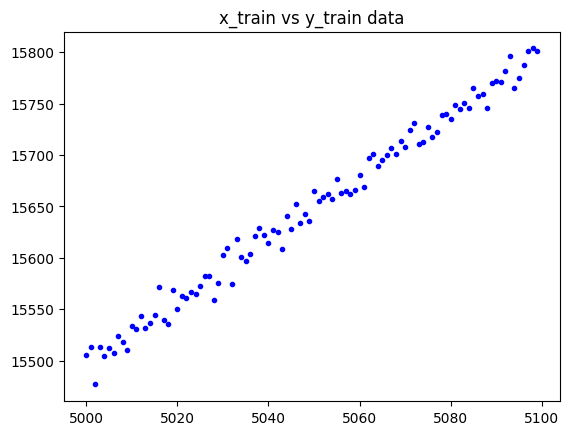

In [10]:
#This step is for data creation, x and y
import numpy as np
x_train= np.array(range(5000,5100)).reshape(-1,1)


y_train=[3*i+np.random.normal(500, 10) for i in x_train]

import matplotlib.pyplot as plt
plt.title("x_train vs y_train data")
plt.plot(x_train, y_train, 'b.')
plt.show()

In [11]:
#Model y=X*W + b
#Model function
def output(x):
    return W*x + b

#Loss function Reduce mean square
def loss_function(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.ones(shape=(1,)))

#Optimization
## Writing training/learing loop with GradienTape
learning_rate = 0.000000001
steps = 200 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(predictions,y_train)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    print(f"epoch : {i}, loss  {loss.numpy()},  W : {W.numpy()}, b  {b.numpy()}")

epoch : 0, loss  221989840.0,  W : [[0.29853457]], b  [1.0000298]
epoch : 1, loss  199925712.0,  W : [[0.44133177]], b  [1.000058]
epoch : 2, loss  180054624.0,  W : [[0.57684684]], b  [1.0000849]
epoch : 3, loss  162158576.0,  W : [[0.7054511]], b  [1.0001104]
epoch : 4, loss  146041232.0,  W : [[0.82749695]], b  [1.0001346]
epoch : 5, loss  131525840.0,  W : [[0.9433189]], b  [1.0001575]
epoch : 6, loss  118453152.0,  W : [[1.0532343]], b  [1.0001793]
epoch : 7, loss  106679808.0,  W : [[1.1575445]], b  [1.0001999]
epoch : 8, loss  96076656.0,  W : [[1.2565352]], b  [1.0002195]
epoch : 9, loss  86527368.0,  W : [[1.3504777]], b  [1.0002381]
epoch : 10, loss  77927192.0,  W : [[1.4396294]], b  [1.0002557]
epoch : 11, loss  70181824.0,  W : [[1.5242348]], b  [1.0002725]
epoch : 12, loss  63206284.0,  W : [[1.6045254]], b  [1.0002884]
epoch : 13, loss  56924064.0,  W : [[1.6807216]], b  [1.0003035]
epoch : 14, loss  51266252.0,  W : [[1.7530321]], b  [1.0003178]
epoch : 15, loss  461707

Final Weights

In [12]:
print('w ', W)
print('b ', b)

w  <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.098584]], dtype=float32)>
b  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.0005829], dtype=float32)>


Plotting

epoch is: 0, loss is 168397040.0,  W is: [[0.6598503]], b is [1.000026]


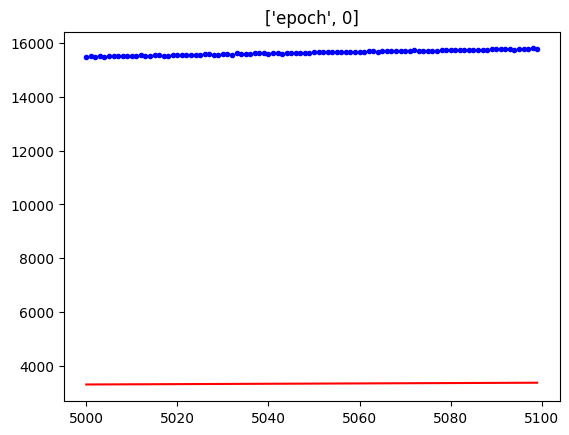

epoch is: 30, loss is 7284629.0,  W is: [[2.5914288]], b is [1.0004085]


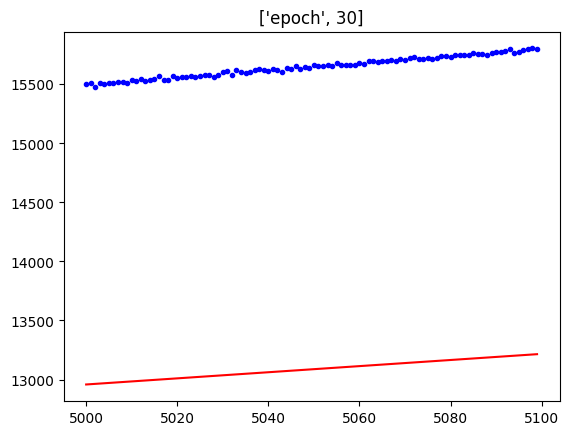

epoch is: 60, loss is 315215.6875,  W is: [[2.9931695]], b is [1.0004883]


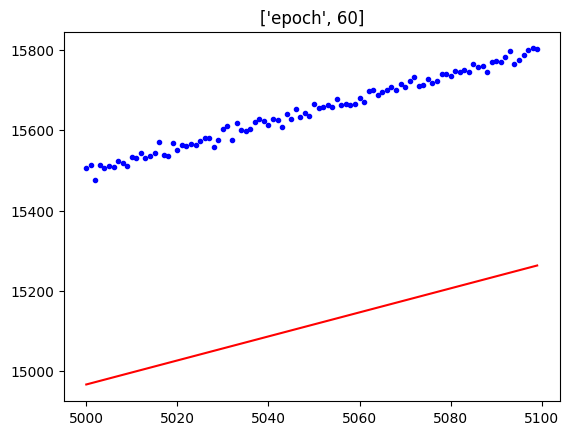

epoch is: 90, loss is 13732.2685546875,  W is: [[3.0767255]], b is [1.0005049]


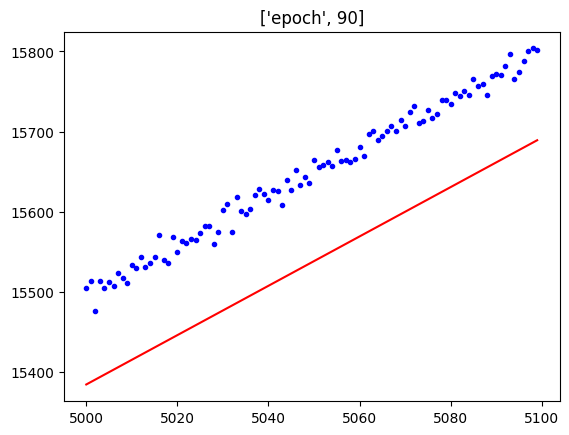

epoch is: 120, loss is 690.1228637695312,  W is: [[3.0941043]], b is [1.0005085]


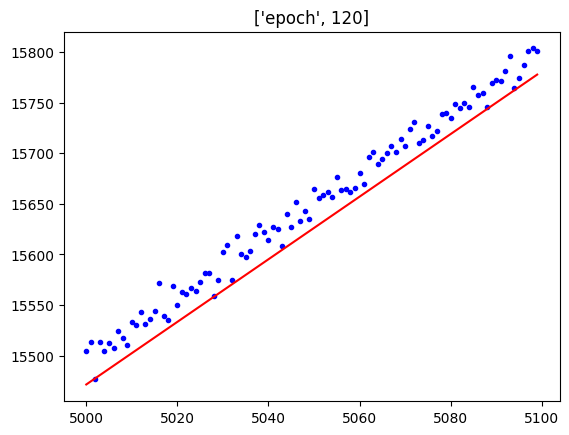

epoch is: 150, loss is 125.91238403320312,  W is: [[3.097719]], b is [1.0005085]


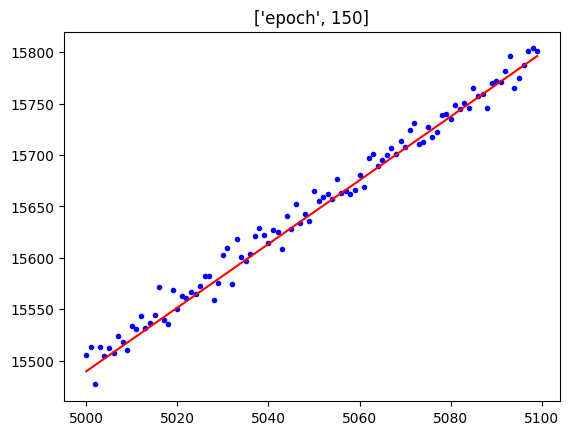

epoch is: 180, loss is 101.50897216796875,  W is: [[3.0984707]], b is [1.0005085]


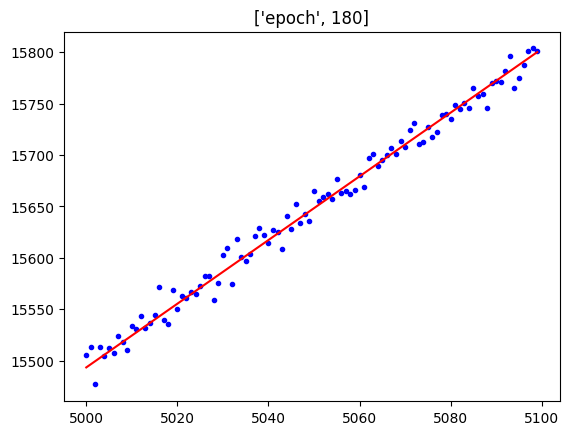

In [13]:
#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.ones(shape=(1,)))

#Optimization
## Writing training/learing loop with GradienTape
learning_rate = 0.000000001
steps = 200 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(predictions,y_train)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    if i%30 == 0:
        print(f"epoch is: {i}, loss is {loss.numpy()},  W is: {W.numpy()}, b is {b.numpy()}")
        plt.title(["epoch", i])
        plt.plot(x_train, y_train, 'b.')
        plt.plot(x_train, output(x_train), c='r')
        plt.show()

### Logistic Regression Model building in TensorFlow

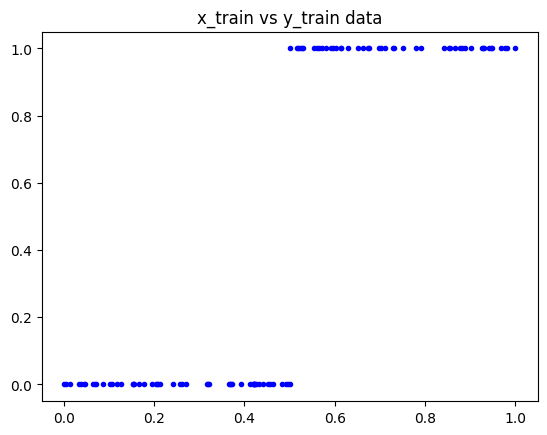

In [14]:
# This step is for data creation
x_train= np.random.rand(100,1)
y_train=np.array([0 if i < 0.5 else 1 for i in x_train]).reshape(-1,1)

import matplotlib.pyplot as plt
plt.title("x_train vs y_train data")
plt.plot(x_train, y_train, 'b.',)
plt.show()

In [15]:
#Model y=sigmoid(X*W + b)
# same as the linear regression just sigmoid wrapped around the linear equation
def output(x): 
    return tf.sigmoid(W*x + b)

#Loss function : sum of squares
def loss_function(y_pred, y_true):
    return tf.reduce_sum(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.zeros(shape=(1,)))

## Optimization
learning_rate = 0.1
steps = 300 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(y_train, predictions)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    print(f"epoch : {i}, loss  {loss.numpy()},  W : {W.numpy()}, b  {b.numpy()}")

epoch : 0, loss  22.972387313842773,  W : [[0.7951644]], b  [-0.4625897]
epoch : 1, loss  20.54338264465332,  W : [[1.2792691]], b  [-0.5032755]
epoch : 2, loss  18.595666885375977,  W : [[1.5688261]], b  [-0.82150346]
epoch : 3, loss  17.02469253540039,  W : [[1.9472404]], b  [-0.8823927]
epoch : 4, loss  15.74941635131836,  W : [[2.1960702]], b  [-1.1182792]
epoch : 5, loss  14.704837799072266,  W : [[2.4956796]], b  [-1.1903377]
epoch : 6, loss  13.840718269348145,  W : [[2.714847]], b  [-1.362775]
epoch : 7, loss  13.117575645446777,  W : [[2.9554927]], b  [-1.4453133]
epoch : 8, loss  12.505361557006836,  W : [[3.1521578]], b  [-1.5723096]
epoch : 9, loss  11.98092269897461,  W : [[3.3513865]], b  [-1.6585599]
epoch : 10, loss  11.52664852142334,  W : [[3.5281425]], b  [-1.7576685]
epoch : 11, loss  11.129133224487305,  W : [[3.699293]], b  [-1.8405459]
epoch : 12, loss  10.778106689453125,  W : [[3.8580432]], b  [-1.9237567]
epoch : 13, loss  10.465608596801758,  W : [[4.0095086]

Plotting

epoch is: 0, loss is 24.5775146484375,  W is: [[0.5724184]], b is [-0.20145848]


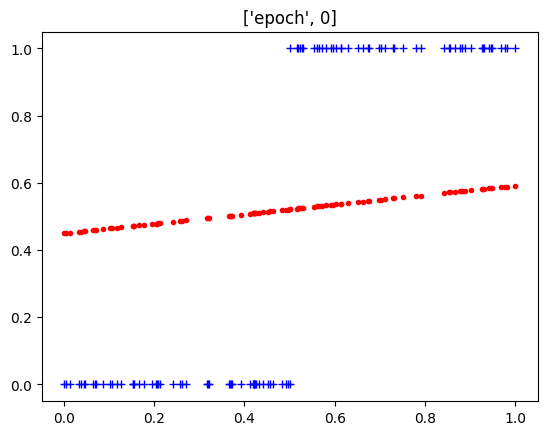

epoch is: 40, loss is 7.125197410583496,  W is: [[6.521919]], b is [-3.2763472]


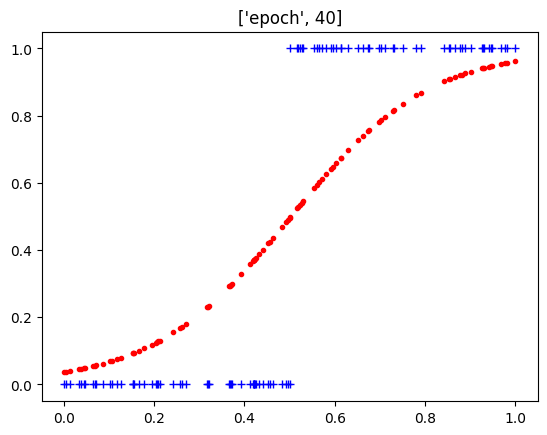

epoch is: 80, loss is 5.6957573890686035,  W is: [[8.61644]], b is [-4.3353925]


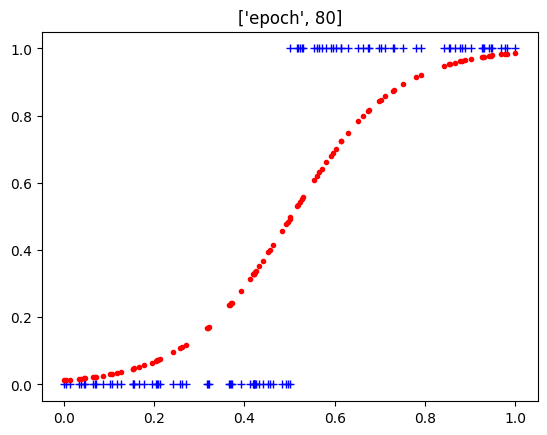

epoch is: 120, loss is 5.003145694732666,  W is: [[10.090983]], b is [-5.079004]


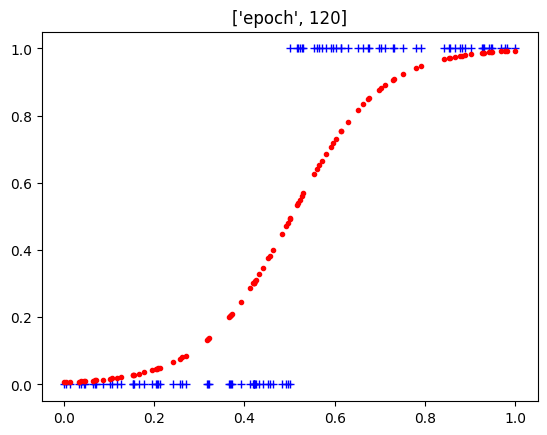

epoch is: 160, loss is 4.55854606628418,  W is: [[11.276419]], b is [-5.6756005]


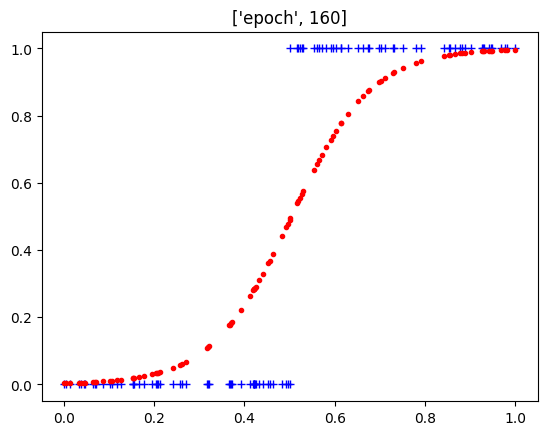

epoch is: 200, loss is 4.237283229827881,  W is: [[12.285788]], b is [-6.182756]


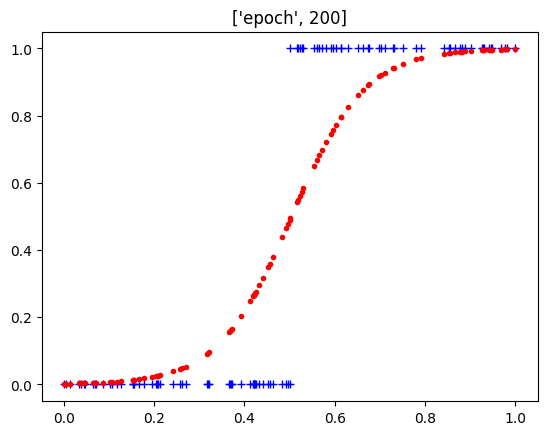

epoch is: 240, loss is 3.989311695098877,  W is: [[13.173478]], b is [-6.628195]


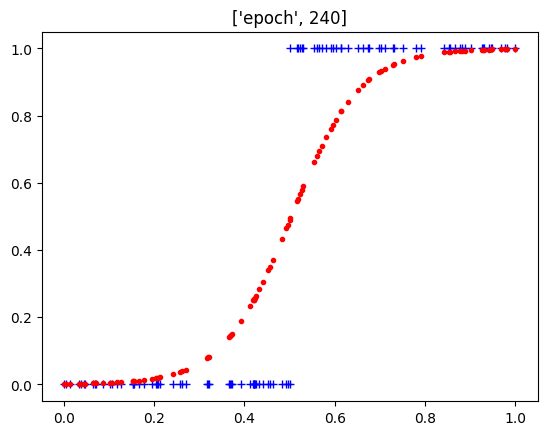

epoch is: 280, loss is 3.7896170616149902,  W is: [[13.970632]], b is [-7.027794]


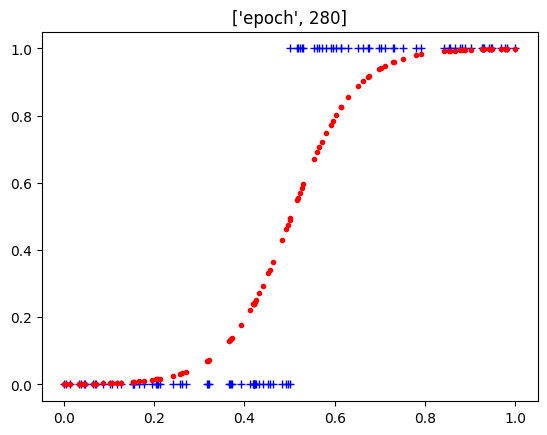

In [16]:
#Model y=X*W + b
# same as the linear regression just sigmoid wrapped around the linear equation
def output(x): 
    return tf.sigmoid(W*x + b)

#Loss function : sum of squares
def loss_function(y_pred, y_true):
    return tf.reduce_sum(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.zeros(shape=(1,)))

## Optimization
learning_rate = 0.1
steps = 300 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(y_train, predictions)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)

    if i%40 == 0:
        print(f"epoch is: {i}, loss is {loss.numpy()},  W is: {W.numpy()}, b is {b.numpy()}")
        plt.title(["epoch", i])
        plt.plot(x_train, y_train, 'b+')
        plt.plot(x_train, output(x_train), '.', c='r')
        plt.show()

# Keras

In [17]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
## The data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
num_classes=10
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)

print(x_train.shape, 'train input samples')
print(x_test.shape, 'test input samples')

print(y_train.shape, 'train output samples')
print(y_test.shape, 'test output samples')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step
(60000, 784) train input samples
(10000, 784) test input samples
(60000, 10) train output samples
(10000, 10) test output samples


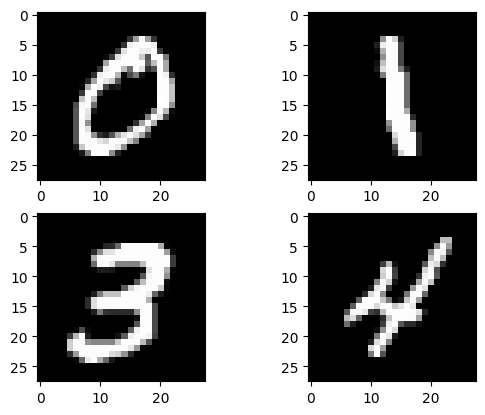

In [19]:
# Plot 4 images as gray scale

%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[6], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[7], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[9], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

In [20]:
model = keras.Sequential()
#Input Layer. The model needs to know what input shape it should expect. 
#For this reason, the first layer in a Sequential model needs to receive information about its input shape.
#Only the first need the snape information, because following layers can do automatic shape inference
model.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))

#The dense layer is simply a layer where each unit or neuron is connected to each neuron in the next layer.
model.add(layers.Dense(20, activation='sigmoid'))

#In the final layer mention the output classes
model.add(layers.Dense(10, activation='softmax'))

#Model Summary
model.summary()

/home/arun/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,330 (63.79 KB)

 Trainable params: 16,330 (63.79 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Compiling model : we define loss function, optimizer and validation matric of our choice
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Fit method: actually running our model by supplying our input and validation data
model.fit(x_train, y_train,epochs=10)

Epoch 1/10


2024-05-14 14:24:11.594147: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 920us/step - accuracy: 0.6204 - loss: 1.4972
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 981us/step - accuracy: 0.9046 - loss: 0.3661
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 961us/step - accuracy: 0.9220 - loss: 0.2734
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9340 - loss: 0.2299
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9388 - loss: 0.2111
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9432 - loss: 0.1956
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 932us/step - accuracy: 0.9474 - loss: 0.1776
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 894us/step - accuracy: 0.9519 - loss: 0.1647
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1000us/step - accuracy: 0.9529 - loss: 0.1590
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 911us/step - accuracy: 0.9548 - loss: 0.1516


In [22]:
print(model.get_weights())

[array([[ 0.04121268,  0.05677752, -0.08155802, ..., -0.01276455,
        -0.00129375, -0.05825999],
       [-0.06786713,  0.06384721,  0.0802248 , ..., -0.01021497,
        -0.0117022 ,  0.03181308],
       [-0.00563501,  0.03354076,  0.08170258, ..., -0.0856849 ,
         0.02741344,  0.01059361],
       ...,
       [ 0.04390836,  0.02768949, -0.07619324, ..., -0.00250667,
        -0.07339093, -0.03784178],
       [-0.04007762,  0.07618344, -0.01003965, ..., -0.00698614,
         0.05037354, -0.01012581],
       [-0.08013085,  0.01900773,  0.02044151, ..., -0.01382034,
        -0.03725106,  0.07558204]], dtype=float32), array([-0.03233138, -0.60051066,  0.16814554,  0.1684694 ,  0.09981458,
        0.17588662,  0.13803467, -0.66996205,  0.12516956, -0.26207605,
       -0.33417454, -0.01056172, -0.17177646, -0.0052819 ,  0.55247414,
       -0.14220014,  0.0397977 ,  0.08198837,  0.5333106 ,  0.05290912],
      dtype=float32), array([[-4.10007447e-01,  1.61036348e+00,  9.80728388e-01,


In [23]:
loss, acc = model.evaluate(x_test,  y_test, verbose=2)
print("Test Accuracy: {:5.2f}%".format(100*acc))

313/313 - 0s - 928us/step - accuracy: 0.9515 - loss: 0.1733
Test Accuracy: 95.15%
